# Soal 1. Pemahaman k-means clustering

Jelaskan bagaimana cara kerja k-means clustering!

Jawab disini:



1.   Lakukan Inisialisasi jumlah kluster k awal secara random
2.   Menentukan Posisi centroid secara random sejumlah k
3.   Jarak antara cetroid dengan setiap data yang ada dihitung kemudian assign data tersebut pada jarak centroid terdekat dan membuat sejumlah k kluster
4.   Melakukan perhitungan kembali untuk mendapatkan posisi centroid yang baru
5.   Menentukan kluster baru dengan memasukkan data dengan jarak terdekat pada centroid yang baru. Jika terjadi perubahan pada member kluster, maka kembali ke step 4 untuk menghitung ulang hingga jumlah member pada kluster tidak mengalami perubahan lagi.





Download disini [pelanggan.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [77]:
import pandas as pd
df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


In [78]:
df = df[['Umur', 'Skor Belanja (1-100)']]

# Soal 2. Clustering data menggunakan k-means clustering

Dalam soal ini, kalian diminta untuk melakukan clustering antara data Umur dan Skor Belanja(1-100). Namun, clustering tidak bisa dilakukan karena data memiliki outlier dan missing value. Maka, lakukanlah tahapan-tahapan berikut:

*   Handling missing value dengan menggunakan method ='ffill'
*   Handling outlier menggunakan metode Interquartile range
*   Lakukan rescaling data menggunakan StandardScaler
*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan.. 
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut










In [79]:
df.isna().sum()

Umur                    5
Skor Belanja (1-100)    4
dtype: int64

In [80]:
df = df.fillna(method='ffill')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Umur                  250 non-null    float64
 1   Skor Belanja (1-100)  250 non-null    float64
dtypes: float64(2)
memory usage: 4.0 KB


In [82]:
df.isna().sum()

Umur                    0
Skor Belanja (1-100)    0
dtype: int64

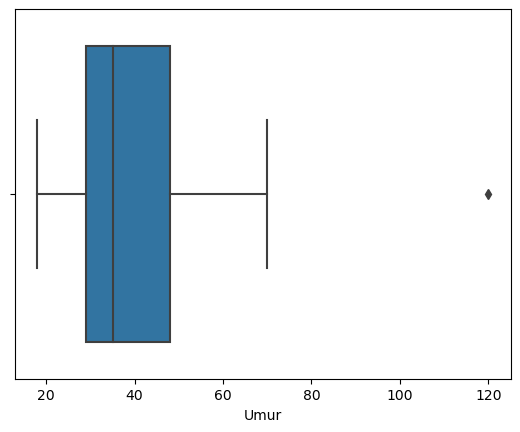

In [83]:
sns.boxplot(x='Umur', data=df);

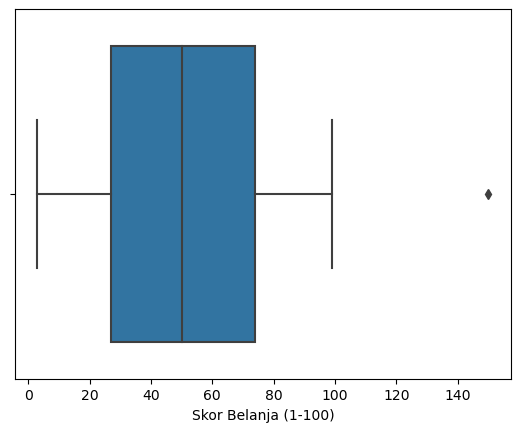

In [84]:
sns.boxplot(x='Skor Belanja (1-100)', data=df);

In [85]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))))]
  return df_final

In [86]:
df_remove_outlier = remove_outlier(df)

In [87]:
df_remove_outlier.dropna(axis=0, inplace=True)

In [88]:
df_remove_outlier

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0
...,...,...
244,27.0,69.0
245,59.0,14.0
246,35.0,90.0
247,37.0,32.0


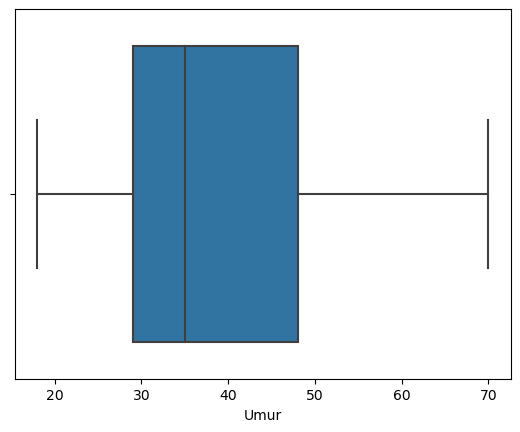

In [89]:
sns.boxplot(x='Umur', data=df_remove_outlier);

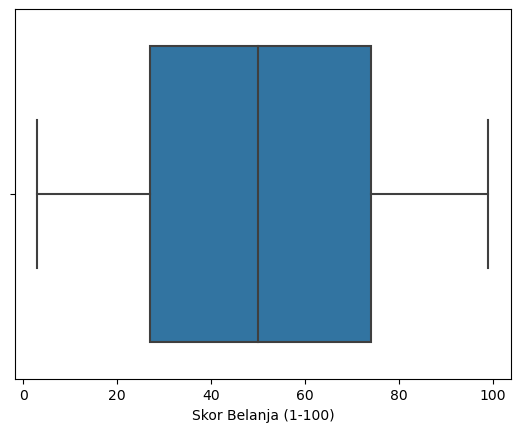

In [90]:
sns.boxplot(x='Skor Belanja (1-100)', data=df_remove_outlier);

In [91]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df_remove_outlier)

In [92]:
df_remove_outlier.isna().sum()

Umur                    0
Skor Belanja (1-100)    0
dtype: int64

In [94]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_

df_kmeans = pd.DataFrame(data=df_std, columns=['Umur', 'Skor Belanja (1-100)'])
df_kmeans['label1_kmeans'] = labels1

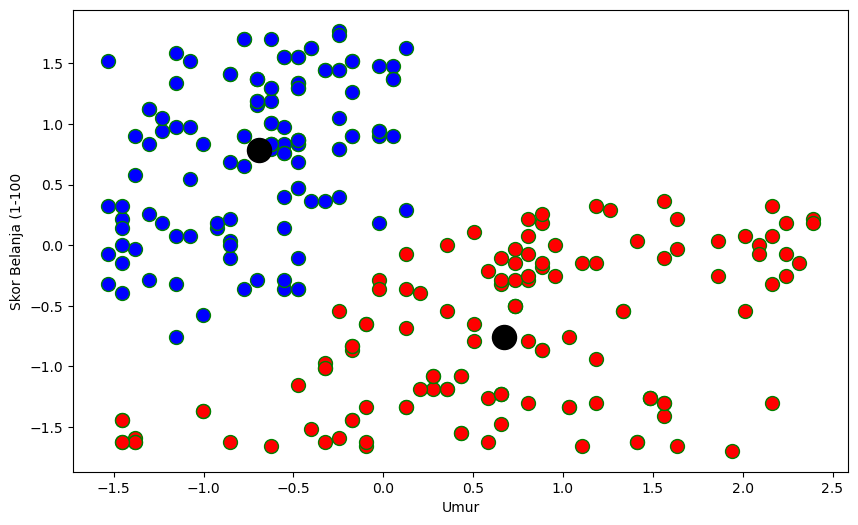

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(df_kmeans['Umur'][df_kmeans.label1_kmeans == 0], df_kmeans['Skor Belanja (1-100)'][df_kmeans.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df_kmeans['Umur'][df_kmeans.label1_kmeans == 1], df_kmeans['Skor Belanja (1-100)'][df_kmeans.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100')
plt.show()

C:\Users\62818\Desktop\projects\env\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


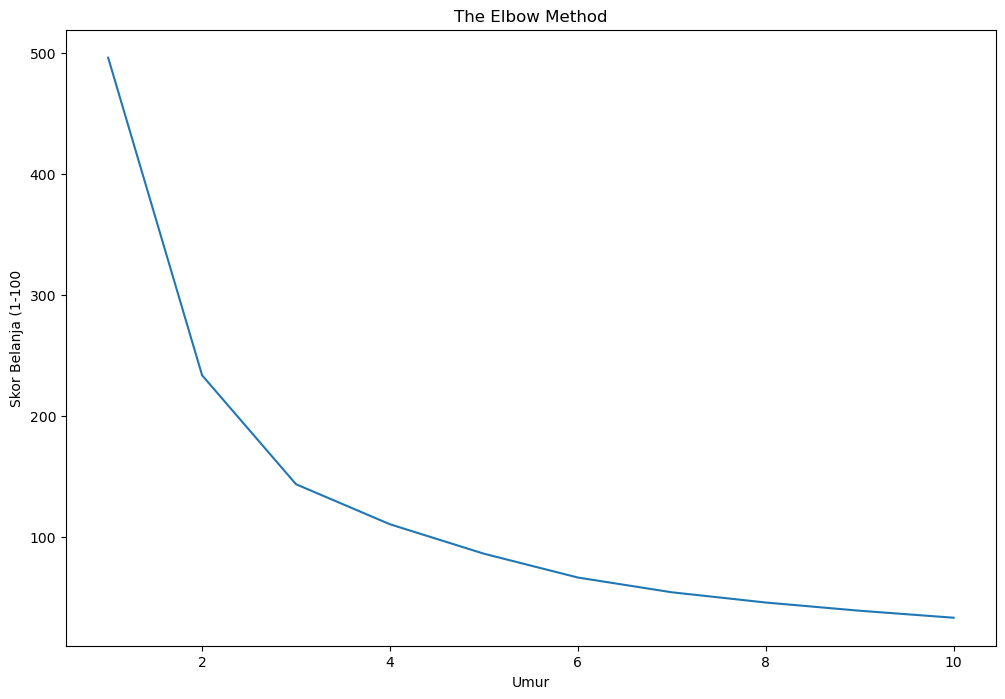

In [97]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100')

plt.show()

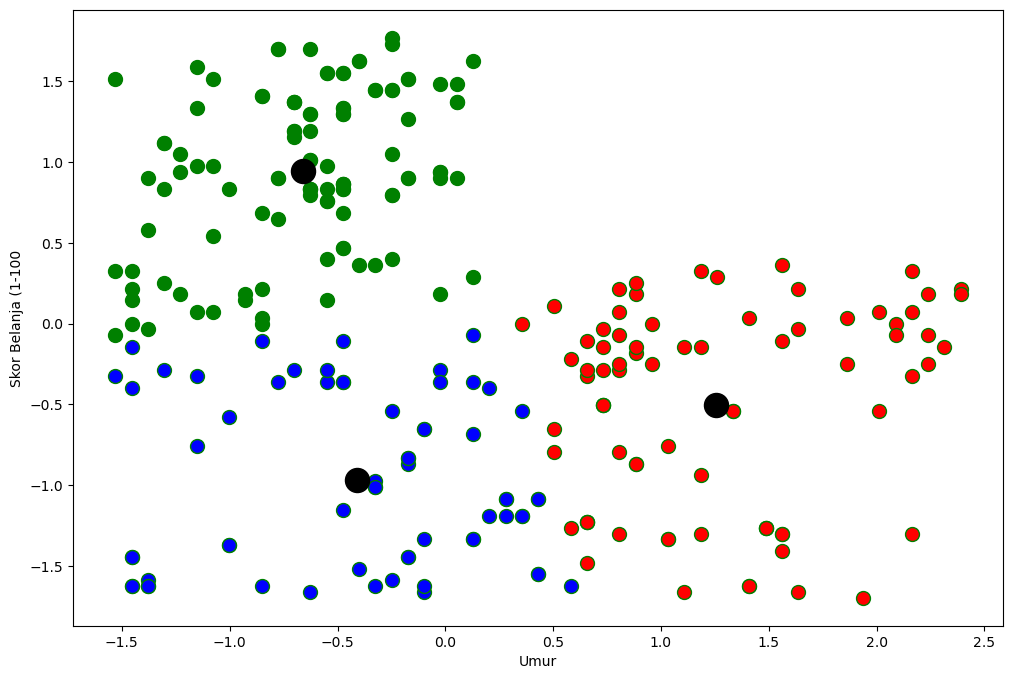

In [99]:
# n=3
kmeans3 = KMeans(n_clusters = 3, random_state=42).fit(df_std)
labels3 = kmeans3.labels_

df_kmeans3 = pd.DataFrame(data=df_std, columns=['Umur', 'Skor Belanja (1-100)'])
df_kmeans3['label3_kmeans'] = labels3

plt.figure(figsize=(12,8))

plt.scatter(df_kmeans3['Umur'][df_kmeans3.label3_kmeans == 0], df_kmeans3['Skor Belanja (1-100)'][df_kmeans3.label3_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df_kmeans3['Umur'][df_kmeans3.label3_kmeans == 1], df_kmeans3['Skor Belanja (1-100)'][df_kmeans3.label3_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(df_kmeans3['Umur'][df_kmeans3.label3_kmeans == 2], df_kmeans3['Skor Belanja (1-100)'][df_kmeans3.label3_kmeans == 2], c='green', s=100, edgecolor='green')

plt.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100')
plt.show()

Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)



---



---



---



# Soal 3. Analisa Data Hasil Clustering

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk kemajuan supermarket. 

Jawab disini:

Berdasarkan hasil segmentasi seperti pada gambar diatas, dapat disimpulkan bahwa terdapat 3 buah segmen konsumen yaitu:
biru, hijau dan orange.
hijau : usia menengah ke bawah dengan skor belanja rendah
orange : usia menengah ke atas dengan skor belanja rendah
biru : usia menengah ke bawah dengan skor belanja tinggi